# Kelompok 3 C2 - Data Gempa Indonesia, Jepang, dan Turki

1. 2101310	AKMAL ZULKIFLI
2. 2205297	NABILLA ASSYFA RAMADHANI
3. 2205410	RADITYA ADHA RAHMAN
4. 2106330	WILDAN MAULI DAROJAT
5. 2201017	ILHAM AKBAR

In [53]:
# display
%matplotlib inline  
# numerik
import numpy as np 
# analisis
import pandas as pd 
# plot
import matplotlib.pyplot as plt  
# visualisasi
import seaborn as sns

from datetime import datetime
import calendar

# [INA]Import Dataset

Import dataset gempa Indonesia dan menampilkan 5 data teratas

In [54]:
df=pd.read_csv("D:\\Kuliah\\Semester 5\\Data Mining and Warehouse\\Tugas 1\\Dataset\\katalog_gempa.csv")
df.head(5)

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


# [INA]Mengganti Nama Atribut

Mengganti nama atribut tgl menjadi date, ot menjadi time, lat menjadi latitude, lon menjadi longitude, remark menjadi city

In [55]:
df.rename(columns={'tgl': 'date', 'ot': 'time', 'lat':'latitude', 'lon':'longitude'},inplace=True) #, 'remark':'city'
df.head(5)

,date,time,latitude,longitude,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


# [INA]Menghapus Atribut 

Menghapus atribut strike1, dip1, rake1, strike2, dip2, dan rake2

In [56]:
df.drop(['strike1', 'dip1', 'rake1', 'strike2', 'dip2', 'rake2'], axis=1, inplace=True)
df.head(5)

,date,time,latitude,longitude,depth,mag,remark
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea


# [INA]Memisahkan Data Atribut Date

In [57]:
df.loc[df['date'].str.contains('/'),'tahun'] = df['date'].str.split('/').str[0]
df.loc[df['date'].str.contains('/'),'bulan'] = df['date'].str.split('/').str[1]
df.loc[df['date'].str.contains('/'),'tangal'] = df['date'].str.split('/').str[2]
df['bulan'] = df['bulan'].apply(lambda x: calendar.month_name[int(x)])
df['tahun'] = df['tahun'].astype("int")
df.head(10)

,date,time,latitude,longitude,depth,mag,remark,tahun,bulan,tangal
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,2008,November,01
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,2008,November,01
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,2008,November,01
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,2008,November,01
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,2008,November,01
5,2008/11/01,14:47:00.029,-7.37,105.31,18,3.3,Java - Indonesia,2008,November,01
6,2008/11/01,13:04:38.742,0.10,98.55,12,4.7,Northern Sumatra - Indonesia,2008,November,01
7,2008/11/01,10:23:51.646,-7.07,129.67,135,4.8,Banda Sea,2008,November,01
8,2008/11/01,09:50:32.503,-3.32,128.02,10,2.3,Seram - Indonesia,2008,November,01
9,2008/11/01,06:50:52.220,-4.43,127.45,10,3.2,Banda Sea,2008,November,01


# [INA]Memisahkan Data Atribut Remark 

Memisahkan atribut remark menjadi city dan country dan menghapus atribut remark

In [58]:
df.loc[df['remark'].str.contains('-'),'city'] = df['remark'].str.split('-').str[0].str[:-1]
df.loc[df['remark'].str.contains('-'),'country'] = df['remark'].str.split('-').str[1].str[1:]
df.loc[~df['remark'].str.contains('-'),'country'] = df.remark
df.loc[df['city'].isna(),'city'] = df.remark
df.loc[df['remark'].str.contains('Sulawesi'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('PNG.'),'country'] = "Papua New Guinea"
df.loc[df['remark'].str.contains('P.N.G.'),'country'] = "Papua New Guinea"
df.loc[df['remark'].str.contains('Banda Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Northern Molucca Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Timor Region'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Flores Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Ceram Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Southern Molucca Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Off West Coast of Northern Sumatra'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Bali Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Celebes Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Savu Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Borneo'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Philippine Islands Region'),'country'] = "Philippines"
df.loc[df['remark'].str.contains('Java Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Timor Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('South China Sea'),'country'] = "China"
df.loc[df['remark'].str.contains('East of Philippine Islands'),'country'] = "Philippines"
df.loc[df['remark'].str.contains('Malay Peninsula'),'country'] = "Thailand"
df.loc[df['remark'].str.contains('Arafura Sea'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('South Indian Ocean'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Near South Coast of Irian Jaya'),'country'] = "Indonesia"
df.loc[df['remark'].str.contains('Near North Coast of Irian Jaya'),'country'] = "Indonesia"
df = df.drop(['remark'], axis=1)
df = df.drop(['date'], axis=1)
df.head(10)

,time,latitude,longitude,depth,mag,tahun,bulan,tangal,city,country
0,21:02:43.058,-9.18,119.06,10,4.9,2008,November,01,Sumba Region,Indonesia
1,20:58:50.248,-6.55,129.64,10,4.6,2008,November,01,Banda Sea,Indonesia
2,17:43:12.941,-7.01,106.63,121,3.7,2008,November,01,Java,Indonesia
3,16:24:14.755,-3.30,127.85,10,3.2,2008,November,01,Seram,Indonesia
4,16:20:37.327,-6.41,129.54,70,4.3,2008,November,01,Banda Sea,Indonesia
5,14:47:00.029,-7.37,105.31,18,3.3,2008,November,01,Java,Indonesia
6,13:04:38.742,0.10,98.55,12,4.7,2008,November,01,Northern Sumatra,Indonesia
7,10:23:51.646,-7.07,129.67,135,4.8,2008,November,01,Banda Sea,Indonesia
8,09:50:32.503,-3.32,128.02,10,2.3,2008,November,01,Seram,Indonesia
9,06:50:52.220,-4.43,127.45,10,3.2,2008,November,01,Banda Sea,Indonesia


In [59]:
df.country.value_counts()

Indonesia           91695
Philippines           958
Papua New Guinea      182
China                  28
Micronesia             15
Thailand                9
Name: country, dtype: int64

In [60]:
df=df[df['country'].str.contains('Indonesia')]
df.country.value_counts()

Indonesia    91695
Name: country, dtype: int64

In [61]:
df.depth.value_counts().sort_index()

2       6
3       9
4      16
5      77
6      11
       ..
738     1
740     2
741     1
745     1
750    20
Name: depth, Length: 653, dtype: int64

# [JPN]Import Dataset

Import dataset gempa Jepang dan menampilkan 5 data teratas

In [62]:
df1=pd.read_csv("D:\\Kuliah\\Semester 5\\Data Mining and Warehouse\\Tugas 1\\Dataset\\earthquake_japan.csv")
df1.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,mb,NaN,92.0,5.044,0.63,...,2018-11-27T16:06:33.040Z,"269km SSW of Severo-Kuril'sk, Russia",earthquake,7.6,1.7,0.036,248.0,reviewed,us,us
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,mww,NaN,113.0,1.359,1.13,...,2018-11-27T16:44:22.223Z,"3km SSW of Sakai, Japan",earthquake,6.0,6.1,0.071,19.0,reviewed,us,us
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,mb,NaN,145.0,1.286,0.84,...,2018-11-26T23:52:21.074Z,"26km SSE of Ofunato, Japan",earthquake,8.4,9.5,0.156,12.0,reviewed,us,us
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,mb,NaN,128.0,3.191,0.62,...,2018-11-26T08:13:58.040Z,"67km S of Severo-Kuril'sk, Russia",earthquake,9.7,7.8,0.045,151.0,reviewed,us,us
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,mb,NaN,104.0,0.558,0.61,...,2018-11-25T23:24:52.615Z,"9km SW of Komatsushima, Japan",earthquake,3.4,10.1,0.132,17.0,reviewed,us,us


In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             14092 non-null  object 
 1   latitude         14092 non-null  float64
 2   longitude        14092 non-null  float64
 3   depth            14092 non-null  float64
 4   mag              14092 non-null  float64
 5   magType          14092 non-null  object 
 6   nst              10483 non-null  float64
 7   gap              13310 non-null  float64
 8   dmin             3607 non-null   float64
 9   rms              14014 non-null  float64
 10  net              14092 non-null  object 
 11  id               14092 non-null  object 
 12  updated          14092 non-null  object 
 13  place            14092 non-null  object 
 14  type             14092 non-null  object 
 15  horizontalError  2800 non-null   float64
 16  depthError       9040 non-null   float64
 17  magError    

# [JPN]Menghapus Atribut

Menghapus atribut magType, nst, gap, dmin, rms, net, id, updated, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource.

In [64]:
df1.drop(['magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource'], axis=1, inplace=True)
df1.head(5)

,time,latitude,longitude,depth,mag,place
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,"269km SSW of Severo-Kuril'sk, Russia"
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,"3km SSW of Sakai, Japan"
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,"26km SSE of Ofunato, Japan"
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,"67km S of Severo-Kuril'sk, Russia"
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,"9km SW of Komatsushima, Japan"


# [JPN]Memisahkan Data Atribut Date

Memisahkan data atribut time menjadi tanggal,tahun, dan bulan

In [65]:
df1['tanggal'] = df1['time'].str.split('T').str[0]
df1['time'] = df1['time'].str.split('T').str[1].str.replace('Z', '')
df1['tahun'] = df1['tanggal'].str.split('-').str[0]
df1['bulan'] = df1['tanggal'].str.split('-').str[1]
df1['bulan'] = df1['bulan'].apply(lambda x: calendar.month_name[int(x)])
df1['tanggal'] = df1['tanggal'].str.split('-').str[2]
df1['time'] = df1['time'].str.split('.').str[0]
df1.head(10)

,time,latitude,longitude,depth,mag,place,tanggal,tahun,bulan
0,14:34:20,48.3780,154.9620,35.00,4.9,"269km SSW of Severo-Kuril'sk, Russia",27,2018,November
1,23:33:50,36.0733,139.7830,48.82,4.8,"3km SSW of Sakai, Japan",26,2018,November
2,13:04:02,38.8576,141.8384,50.56,4.5,"26km SSE of Ofunato, Japan",26,2018,November
3,05:20:16,50.0727,156.1420,66.34,4.6,"67km S of Severo-Kuril'sk, Russia",26,2018,November
4,09:19:05,33.9500,134.4942,38.19,4.6,"9km SW of Komatsushima, Japan",25,2018,November
5,03:16:46,48.4158,155.0325,35.00,4.6,"263km SSW of Severo-Kuril'sk, Russia",25,2018,November
6,14:30:14,37.1821,141.1721,46.76,5.2,"29km ENE of Iwaki, Japan",23,2018,November
7,07:19:51,29.3424,142.3121,10.00,4.7,"250km N of Chichi-shima, Japan",23,2018,November
8,20:16:02,44.4524,148.0753,101.46,4.7,"88km S of Kuril'sk, Russia",20,2018,November
9,19:09:48,30.4087,130.0687,123.00,5.5,"96km WSW of Nishinoomote, Japan",20,2018,November


In [66]:
df1.place.value_counts()

off the east coast of Honshu, Japan     2344
near the east coast of Honshu, Japan    2141
Kuril Islands                           1789
Bonin Islands, Japan region              858
Izu Islands, Japan region                617
                                        ... 
1km N of Koshigaya, Japan                  1
4km W of Sakura, Japan                     1
55km SE of Katsuura, Japan                 1
6km S of Gyeongju, South Korea             1
Yellow Sea                                 1
Name: place, Length: 3214, dtype: int64

# [JPN]Memisahkan Data Atribut Place

Memisahkan data atribut place menjadi country dan city

In [67]:
df1.loc[df1['place'].str.contains(','),'country'] = df1['place'].str.split(',').str[1].str[1:]
df1.loc[~df1['place'].str.contains(','),'country'] = df1.place
df1.loc[df1['place'].str.contains(','),'city'] = df1['place'].str.split(' of ').str[1]
df1.loc[df1['place'].str.contains(','),'city'] = df1['city'].str.split(',').str[0]
df1.loc[df1['city'].isna(),'city'] = df1.place
df1.head(10)

,time,latitude,longitude,depth,mag,place,tanggal,tahun,bulan,country,city
0,14:34:20,48.3780,154.9620,35.00,4.9,"269km SSW of Severo-Kuril'sk, Russia",27,2018,November,Russia,Severo-Kuril'sk
1,23:33:50,36.0733,139.7830,48.82,4.8,"3km SSW of Sakai, Japan",26,2018,November,Japan,Sakai
2,13:04:02,38.8576,141.8384,50.56,4.5,"26km SSE of Ofunato, Japan",26,2018,November,Japan,Ofunato
3,05:20:16,50.0727,156.1420,66.34,4.6,"67km S of Severo-Kuril'sk, Russia",26,2018,November,Russia,Severo-Kuril'sk
4,09:19:05,33.9500,134.4942,38.19,4.6,"9km SW of Komatsushima, Japan",25,2018,November,Japan,Komatsushima
5,03:16:46,48.4158,155.0325,35.00,4.6,"263km SSW of Severo-Kuril'sk, Russia",25,2018,November,Russia,Severo-Kuril'sk
6,14:30:14,37.1821,141.1721,46.76,5.2,"29km ENE of Iwaki, Japan",23,2018,November,Japan,Iwaki
7,07:19:51,29.3424,142.3121,10.00,4.7,"250km N of Chichi-shima, Japan",23,2018,November,Japan,Chichi-shima
8,20:16:02,44.4524,148.0753,101.46,4.7,"88km S of Kuril'sk, Russia",20,2018,November,Russia,Kuril'sk
9,19:09:48,30.4087,130.0687,123.00,5.5,"96km WSW of Nishinoomote, Japan",20,2018,November,Japan,Nishinoomote


In [68]:
df1.isna().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
place        0
tanggal      0
tahun        0
bulan        0
country      0
city         0
dtype: int64

# [JPN]Menyesuaikan Data Atribut Country

Menyesuaikan data atribut country

In [69]:
df1.loc[df1['country'].str.contains('Japan'),'country'] = "Japan"
df1.loc[df1['country'].str.contains('Kuril Islands'),'country'] = "Japan"
df1.loc[df1['country'].str.contains('Volcano Islands'),'country'] = "Japan"
df1.loc[df1['country'].str.contains('Sea of Okhotsk'),'country'] = "Japan"
df1.loc[df1['country'].str.contains('Korea Strait'),'country'] = "Japan"
df1.loc[df1['country'].str.contains('Izu Islands'),'country'] = "Japan"
df1.country.value_counts()

Japan                                              13386
Russia                                               617
northeast of Taiwan                                   45
China                                                 14
North Korea                                           10
South Korea                                           10
eastern Russia-northeastern China border region        5
China-Russia-North Korea border region                 3
Philippine Sea                                         1
Yellow Sea                                             1
Name: country, dtype: int64

In [70]:
df1=df1[df1['country'].str.contains('Japan')]
df1.country.value_counts()

Japan    13386
Name: country, dtype: int64

In [71]:
#Buang atribut place
df1=df1.drop(['place'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13386 entries, 1 to 14091
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       13386 non-null  object 
 1   latitude   13386 non-null  float64
 2   longitude  13386 non-null  float64
 3   depth      13386 non-null  float64
 4   mag        13386 non-null  float64
 5   tanggal    13386 non-null  object 
 6   tahun      13386 non-null  object 
 7   bulan      13386 non-null  object 
 8   country    13386 non-null  object 
 9   city       13386 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.1+ MB


In [72]:
df1.tahun.value_counts().sort_index()

2001     374
2002     340
2003     544
2004     511
2005     412
2006     854
2007     625
2008     441
2009     319
2010     650
2011    3804
2012    1076
2013     614
2014     656
2015     584
2016     688
2017     448
2018     446
Name: tahun, dtype: int64

# [TUR]Import Dataset

Import dataset gempa Turki dan menampilkan 5 data teratas

In [73]:
df2=pd.read_csv("D:\\Kuliah\\Semester 5\\Data Mining and Warehouse\\Tugas 1\\Dataset\\earthquake_turkey.csv")
df2.head(5)

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [74]:
#Buang atribut ID
df2=df2.drop(['id'],axis=1)

# [TUR]Mengganti Nama Atribut

Mengganti nama atribut lat menjadi latitude, lon menjadi longitude

In [75]:
df2.rename(columns={'lat':'latitude', 'lon':'longitude'},inplace=True)
df2.head(5)

,date,time,latitude,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [76]:
df2.loc[~(df2.country=="turkey")]

,date,time,latitude,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
10064,1910.12.04,12:02:00 AM,39.30,48.00,azerbaijan,NaN,NaN,NaN,NaN,37.0,5.5,5.3,5.3,5.5,5.4,5.3
10065,1911.03.11,12:40:02 AM,42.00,23.00,bulgaria,NaN,NaN,NaN,NaN,50.0,5.6,5.4,5.3,5.6,5.5,5.4
10066,1911.04.04,12:43:05 AM,36.50,25.50,mediterranean,NaN,NaN,NaN,NaN,140.0,7.1,6.6,6.6,6.7,7.1,6.5
10068,1911.06.23,12:30:02 AM,40.00,48.00,azerbaijan,NaN,NaN,NaN,NaN,18.0,5.3,5.0,4.9,5.3,5.0,5.0
10069,1911.09.08,12:09:01 AM,43.40,28.10,bulgaria,NaN,NaN,NaN,NaN,10.0,4.9,4.8,4.8,4.9,4.8,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23828,2017.07.27,12:45:18 AM,40.30,25.25,aegeansea,NaN,NaN,NaN,NaN,13.6,4.2,0.0,3.8,4.2,0.0,0.0
23830,2017.07.28,12:50:30 AM,36.88,45.07,iran,NaN,NaN,NaN,NaN,5.0,4.2,0.0,4.1,4.2,0.0,0.0
23831,2017.07.28,12:27:55 AM,34.68,25.20,greece,NaN,girit_adasi,NaN,NaN,15.9,3.7,0.0,3.6,3.7,0.0,0.0
23841,2017.07.31,12:29:09 AM,34.16,23.91,greece,NaN,girit_adasi,NaN,NaN,16.2,5.3,0.0,5.3,0.0,0.0,0.0


In [77]:
df2.country.value_counts()

turkey              11850
mediterranean        4843
greece               3560
aegeansea            1748
iran                  346
georgia               322
russia                303
bulgaria              176
syria                 154
azerbaijan            150
cyprus_greek          133
iraq                  122
blacksea               90
turkiye_iran           74
romania                44
macedonia              28
cyprus_turkish         26
turkiye_iraq           10
#NAME?                 10
turkiye_syria           6
turkiye_armenia         5
albania                 2
egypt                   2
israel                  1
ukrainia                1
turkiye_georgia         1
Name: country, dtype: int64

In [78]:
df2.isna().sum()

date             0
time             0
latitude         0
long             0
country          0
city         12253
area         11030
direction    13945
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
dtype: int64

# [TUR]Memisahkan Data Atribut Time

Memisahkan data atribut time menjadi tanggal,tahun, bulan, dan waktu

In [79]:
#df2.loc[df2['area'].str.contains('_'),'city'] = df2['area'].str.split('_').str[1]
#df2.area.value_counts()
df2['tahun'] = df2['date'].str.split('.').str[0]
df2['bulan'] = df2['date'].str.split('.').str[1]
df2['bulan'] = df2['bulan'].apply(lambda x: calendar.month_name[int(x)])
df2['tanggal'] = df2['date'].str.split('.').str[2]
df2['time'] = df2['time'].apply(lambda x: datetime.strptime(x, "%I:%M:%S %p").strftime("%H:%M:%S"))
# df2['time'] = df2['time'] + ".058"
df2.head(10)

,date,time,latitude,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,tahun,bulan,tanggal
0,2003.05.20,00:17:44,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,2003,May,20
1,2007.08.01,00:03:08,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,2007,August,01
2,1978.05.07,00:41:37,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1978,May,07
3,1997.03.22,00:31:45,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,1997,March,22
4,2000.04.02,00:57:38,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,2000,April,02
5,2005.01.21,00:04:03,37.11,27.75,turkey,mugla,demirciler_milas,south_west,0.1,32.8,3.5,3.5,0.0,NaN,0.0,0.0,2005,January,21
6,2012.06.24,00:07:22,38.75,43.61,turkey,van,ilikaynak,south_west,0.1,9.4,4.5,0.0,4.5,NaN,0.0,0.0,2012,June,24
7,1987.12.31,00:49:54,39.43,27.98,turkey,balikesir,dikkonak_bigadic,south_east,0.1,26.0,3.8,3.8,0.0,NaN,0.0,0.0,1987,December,31
8,2000.02.07,00:11:45,40.05,34.07,turkey,kirikkale,kocabas_delice,south_east,0.1,1.0,3.8,3.8,0.0,NaN,0.0,0.0,2000,February,07
9,2011.10.28,00:47:56,38.76,43.54,turkey,van,degirmenozu,south_east,0.1,3.1,4.3,0.0,4.2,NaN,0.0,4.3,2011,October,28


In [80]:
#Buang atribut berikut
df2.drop(['direction', 'dist', 'mw', 'ms', 'date'], axis=1, inplace=True)
df2.head(15)

,time,latitude,long,country,city,area,depth,xm,md,richter,mb,tahun,bulan,tanggal
0,00:17:44,39.04,40.38,turkey,bingol,baliklicay,10.0,4.1,4.1,0.0,0.0,2003,May,20
1,00:03:08,40.79,30.09,turkey,kocaeli,bayraktar_izmit,5.2,4.0,3.8,4.0,0.0,2007,August,01
2,00:41:37,38.58,27.61,turkey,manisa,hamzabeyli,0.0,3.7,0.0,0.0,3.7,1978,May,07
3,00:31:45,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,10.0,3.5,3.5,0.0,0.0,1997,March,22
4,00:57:38,40.80,30.24,turkey,sakarya,meseli_serdivan,7.0,4.3,4.3,0.0,0.0,2000,April,02
5,00:04:03,37.11,27.75,turkey,mugla,demirciler_milas,32.8,3.5,3.5,0.0,0.0,2005,January,21
6,00:07:22,38.75,43.61,turkey,van,ilikaynak,9.4,4.5,0.0,4.5,0.0,2012,June,24
7,00:49:54,39.43,27.98,turkey,balikesir,dikkonak_bigadic,26.0,3.8,3.8,0.0,0.0,1987,December,31
8,00:11:45,40.05,34.07,turkey,kirikkale,kocabas_delice,1.0,3.8,3.8,0.0,0.0,2000,February,07
9,00:47:56,38.76,43.54,turkey,van,degirmenozu,3.1,4.3,0.0,4.2,4.3,2011,October,28


# [TUR]Menyesuaikan Data Atribut Country

Menyesuaikan data atribut country

In [81]:
df2.loc[df2['country'].str.contains('turkey'),'country'] = "Turkey"
df2.loc[df2['country'].str.contains('turkiye'),'country'] = "Turkey"
df2.loc[df2['country'].str.contains('aegeansea'),'country'] = "Turkey"
df2.loc[df2['country'].str.contains('cyprus'),'country'] = "Turkey"
df2.loc[df2['country'].str.contains('blacksea'),'country'] = "Turkey"
df2.country.value_counts()

Turkey           13943
mediterranean     4843
greece            3560
iran               346
georgia            322
russia             303
bulgaria           176
syria              154
azerbaijan         150
iraq               122
romania             44
macedonia           28
#NAME?              10
albania              2
egypt                2
israel               1
ukrainia             1
Name: country, dtype: int64

In [82]:
df2=df2[df2['country'].str.contains('Turkey')]
df2.country.value_counts()

Turkey    13943
Name: country, dtype: int64

In [83]:
df2.tahun.value_counts().sort_index()

1911      1
1912      8
1913      1
1914     21
1915      5
       ... 
2013    264
2014    267
2015    232
2016    228
2017    397
Name: tahun, Length: 107, dtype: int64

# Data Visualization

# COUNTPLOT

Menampilkan data banyak gempa dari ketiga negara dengan range tahun 2008 - 2017

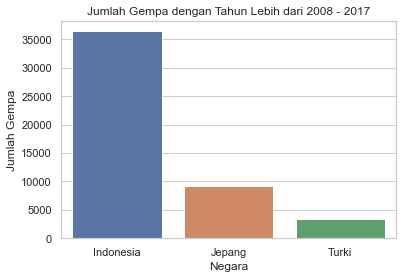

In [84]:
# plt.figure(figsize=(10,3)) # set ukuran x, y
# plt.title("Test") # set tittle
# sns.countplot(x="country", data = df)

df['tahun'] = df['tahun'].astype(int)
df1['tahun'] = df1['tahun'].astype(int)
df2['tahun'] = df2['tahun'].astype(int)

data_indonesia = df[(df['tahun'] > 2007) & (df['tahun'] < 2018)] 
data_japan = df1[(df1['tahun'] > 2007) & (df1['tahun'] < 2018)]
data_turkey = df2[(df2['tahun'] > 2007)]

count_indonesia = data_indonesia.shape[0]
count_japan = data_japan.shape[0]
count_turkey = data_turkey.shape[0]

sns.set(style='whitegrid')
sns.barplot(x=['Indonesia', 'Jepang', 'Turki'], y=[count_indonesia, count_japan, count_turkey])
plt.title('Jumlah Gempa dengan Tahun Lebih dari 2008 - 2017')
plt.xlabel('Negara')
plt.ylabel('Jumlah Gempa')
plt.show()

Catatan: Selama tahun 2008 - 2017, Indonesia lebih sering terjadi gempa dibanding Jepang dan Turki

# LINEPLOT

Menampilkan banyaknya frekuensi gempa pada tahun 2008 - 2017 di ketiga negara.

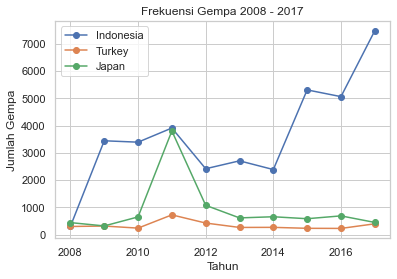

In [85]:
jumlah_gempa_indonesia = data_indonesia.groupby('tahun').size()
jumlah_gempa_turkey = data_turkey.groupby('tahun').size()
jumlah_gempa_japan = data_japan.groupby('tahun').size()


plt.plot(jumlah_gempa_indonesia.index, jumlah_gempa_indonesia.values, label='Indonesia', marker='o', linestyle='-')
plt.plot(jumlah_gempa_turkey.index, jumlah_gempa_turkey.values, label='Turkey', marker='o', linestyle='-')
plt.plot(jumlah_gempa_japan.index, jumlah_gempa_japan.values, label='Japan', marker='o', linestyle='-')

plt.title('Frekuensi Gempa 2008 - 2017')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Gempa')
plt.legend()
plt.grid(True)
plt.show()

Catatan: 
Indonesia: Pada tahun 2009 Indonesia mengalami kenaikan jumlah gempa, pada tahun 2011 hingga 2014 Indonesia mengalami penurunan, dan pada tahun yang sama menjadi titik awal kenaikan signifikan hingga 2017.
Jepang: Terjadi lonjakan signifikan jumlah gempa pada tahun 2011, tahun berikutnya kembali seperti rata-rata.
Turki: Terjadi lonjakan jumlah gempa pada tahun 2011, tahun berikutnya kembali seperti rata-rata

# BARPLOT

Membandingkan rata-rata magnitudo setiap negara dari tahun 2008 - 2017

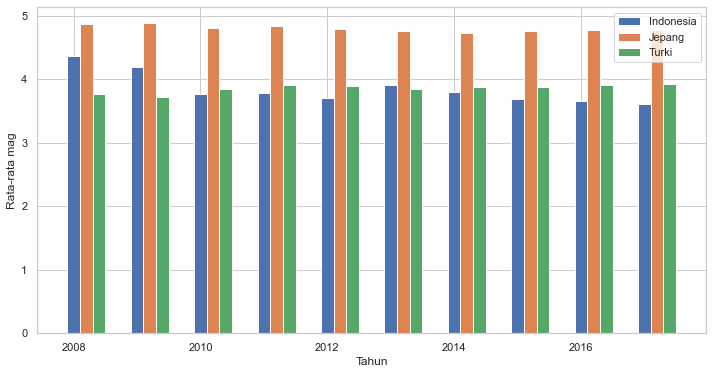

In [86]:
data_rata_mag_indonesia = data_indonesia.groupby('tahun')['mag'].mean()
data_rata_mag_japan = data_japan.groupby('tahun')['mag'].mean()
data_rata_xm_turkey = data_turkey.groupby('tahun')['xm'].mean()

data_perbandingan_rata = pd.merge(data_rata_mag_indonesia, data_rata_mag_japan, on='tahun', how='inner')
data_perbandingan_rata = pd.merge(data_perbandingan_rata, data_rata_xm_turkey, on='tahun' , how='inner' )

# Membuat bar plot
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Lebar setiap batang
x = data_perbandingan_rata.index

ax.bar(x, data_perbandingan_rata['mag_x'], width=width, label='Indonesia')
ax.bar([i + width for i in x], data_perbandingan_rata['mag_y'], width=width, label='Jepang')
ax.bar([i + 2 * width for i in x], data_perbandingan_rata['xm'], width=width, label='Turki')

ax.set_xlabel('Tahun')
ax.set_ylabel('Rata-rata mag')

ax.legend()
plt.show()

Catatan: Dapat dilihat, rata-rata magnitudo Jepang adalah yang tertinggi dibanding negara lain, bahkan dibanding Indonesia yang sering terjadi gempa. Selain tahun 2008 dan 2009, magnitudo rata-rata Indonesia dan Turki relatif hampir sama (dibawah 4)

# COUNTPLOT PART 2

Menampilkan banyaknya gempa di setiap daerah di Indonesia

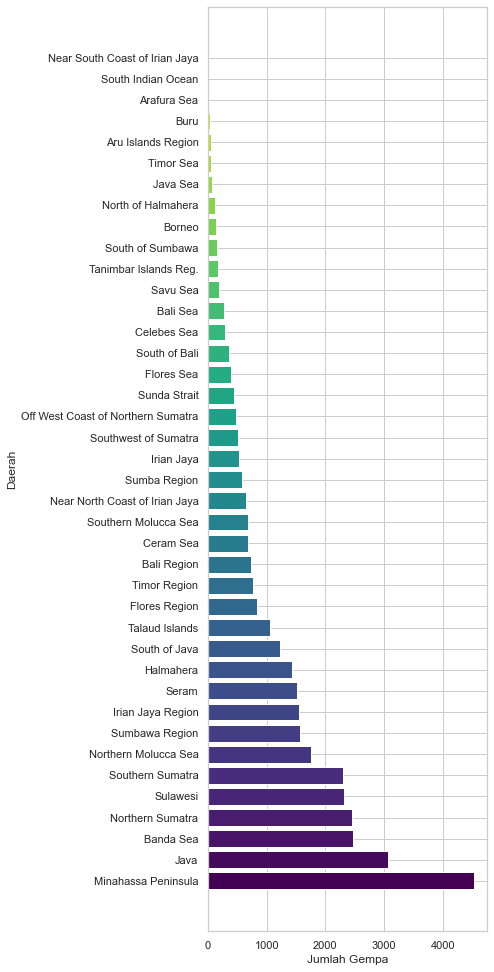

In [87]:
jumlah_gempa_daerah_indonesia = data_indonesia.groupby('city').size()

fig, ax = plt.subplots(figsize=(5, 17))
#urutkan
jumlah_gempa_daerah_indonesia = jumlah_gempa_daerah_indonesia.sort_values(ascending=False)
#balik x dan y  
colors = plt.cm.viridis(np.linspace(0, 1, len(jumlah_gempa_daerah_indonesia)))
x = jumlah_gempa_daerah_indonesia.index
y = jumlah_gempa_daerah_indonesia.values
bars = ax.barh(x,y,color=colors)
ax.set_xlabel('Jumlah Gempa')
ax.set_ylabel('Daerah')

plt.show()

# COUNTPLOT PART 3

Menampilkan banyaknya gempa di setiap daerah di Jepang

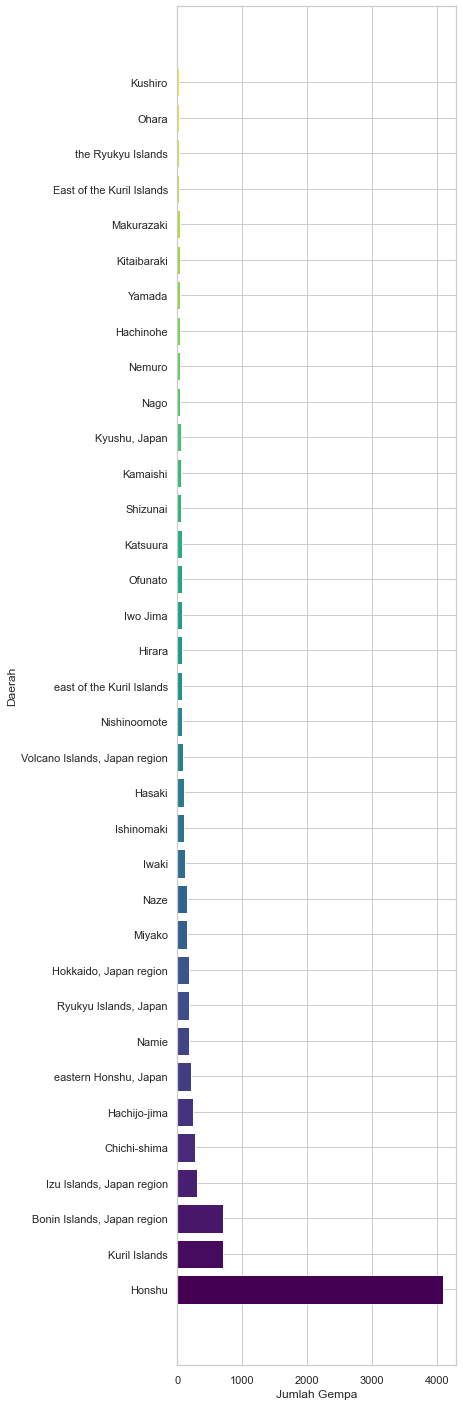

In [88]:
jumlah_gempa_daerah_jepang = data_japan.groupby('city').size()

fig, ax = plt.subplots(figsize=(5, 25))
#urutkan
jumlah_gempa_daerah_jepang = jumlah_gempa_daerah_jepang.sort_values(ascending=False)
jumlah_gempa_daerah_jepang = jumlah_gempa_daerah_jepang.head(35)
#balik x dan y  
colors = plt.cm.viridis(np.linspace(0, 1, len(jumlah_gempa_daerah_jepang)))
x = jumlah_gempa_daerah_jepang.index
y = jumlah_gempa_daerah_jepang.values
bars = ax.barh(x,y,color=colors)
ax.set_xlabel('Jumlah Gempa')
ax.set_ylabel('Daerah')

plt.show()

# COUNTPLOT PART 4

Menampilkan banyaknya gempa di setiap daerah di Turki

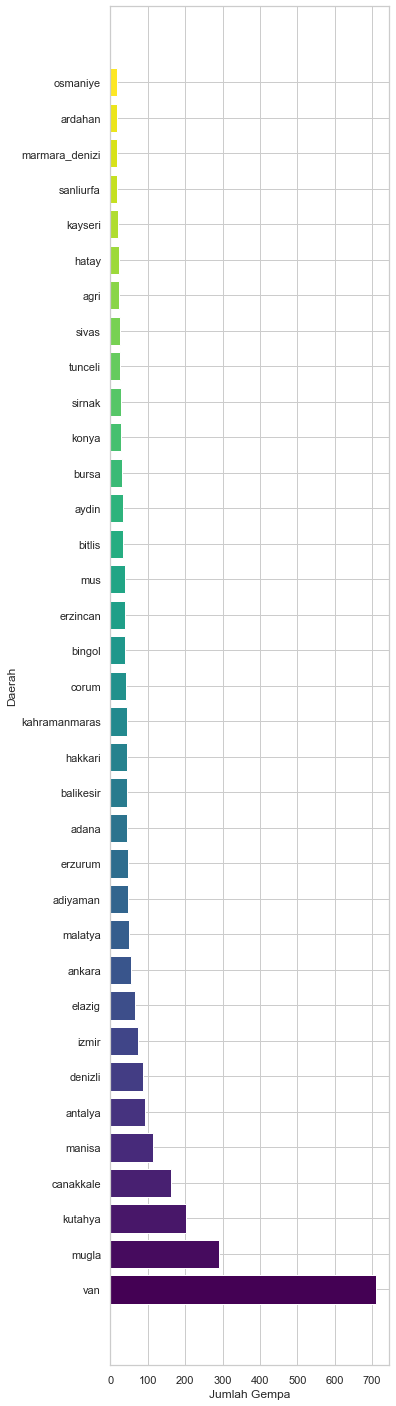

In [89]:
jumlah_gempa_daerah_turki = data_turkey.groupby('city').size()

fig, ax = plt.subplots(figsize=(5, 25))
#urutkan
jumlah_gempa_daerah_turki = jumlah_gempa_daerah_turki.sort_values(ascending=False)
jumlah_gempa_daerah_turki = jumlah_gempa_daerah_turki.head(35)
#balik x dan y  
colors = plt.cm.viridis(np.linspace(0, 1, len(jumlah_gempa_daerah_turki)))
x = jumlah_gempa_daerah_turki.index
y = jumlah_gempa_daerah_turki.values
bars = ax.barh(x,y,color=colors)
ax.set_xlabel('Jumlah Gempa')
ax.set_ylabel('Daerah')

plt.show()

Catatan: Di ketiga negara memiliki daerah yang sering terjadi gempa dibanding daerah lainnya.

# FACEGRID 

Menampilkan hubungan magnitudo dan kedalaman (depth) di setiap negara

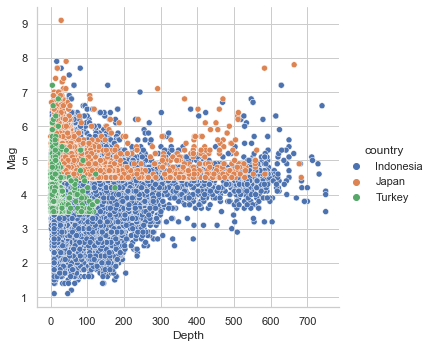

In [90]:
data_gabungan_indonesia = data_indonesia[['depth', 'mag','country']].copy()
data_gabungan_japan = data_japan[['depth', 'mag','country']].copy()
data_gabungan_turkey = data_turkey[['depth', 'xm','country']].copy()

data_gabungan_turkey = data_gabungan_turkey.rename(columns={'xm': 'mag'})
data_gabungan = pd.concat([data_gabungan_indonesia, data_gabungan_japan, data_gabungan_turkey])

# Buat relplot untuk membandingkan 'depth' dan 'mag' atau 'xm' dalam konteks 'country'
g = sns.relplot(data=data_gabungan, x='depth', y='mag', hue='country', kind='scatter')

# Atur label sumbu
g.set_axis_labels("Depth", "Mag")

plt.show()

Catatan: Semakin dekat kedalaman gempa, ada kemungkinan semakin besar magnitudonya. Walau begitu, semakin dalam gempa, tetap ada kemungkinan magnitudonya besar.